# Deliverables:

- Submit two files that has the name: <font color = 'red'>YourLastName_Exercise_3:</font>

 1. Your **HTML file** that has your Source code and output
 2. Your **IPYNB script** that has your Source code and output


# Objectives:

In this exercise, you will:

 - Analyze the dataset in the given CSV file
 - Clean the given dataset
 - Load the dataset into sqlite database engine
 - Execute different SQL queries

 


###   Data Preparation

As a data scientist for BestDeal retailer, you
have been tasked with improving their revenue and the effectiveness of the
marketing campaign of their electronic products. The given dataset has
10,000 records for the purchases of their customers and is used to predict
customers shopping patterns and to provide answers for ad-hoc queries.
The dataset DirtyData4BestDeal10000.csv is drawn from its database of
customers.

In [1]:
# load libraries
import pandas as pd  
import numpy as np  
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import inspect

# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Lets read the dirtydata4bestdeal CSV and load into a dataframe object

In [2]:
dirtydata=pd.read_csv('DirtyData4BestDeal10000.csv')

# check out the variables
dirtydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ZipCode             9856 non-null   float64
 1   CustomerAge         9856 non-null   float64
 2   SamsungTV46LED      10000 non-null  int64  
 3   SonyTV42LED         9984 non-null   object 
 4   XBOX360             9992 non-null   object 
 5   DellLaptop          9968 non-null   object 
 6   BoseSoundSystem     9981 non-null   object 
 7   BoseHeadSet         9976 non-null   float64
 8   SonyHeadSet         9976 non-null   float64
 9   iPod                9968 non-null   float64
 10  iPhone              9984 non-null   float64
 11  Panasonic50LED      9992 non-null   float64
 12  SonyPS4             9999 non-null   float64
 13  WiiU                9976 non-null   float64
 14  WDexternalHD        9985 non-null   float64
 15  SamsungTV55LED      9984 non-null   float64
 16  SonyT

In [3]:
# Do you see NaN values below?
dirtydata.head()

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1,1,0,0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1,0,0,1,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
2,60611.0,23.0,1,NaN,0,1,0,NaN,1.0,1.0,...,0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,1.0,1
3,60616.0,56.0,0,1,1,1,0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,30303.0,25.0,1,NaN,0,NaN,1,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,10.0,0


### Lets use boxplot to visualize the data and get an idea if there are dirty/messy/invalid data

<AxesSubplot:>

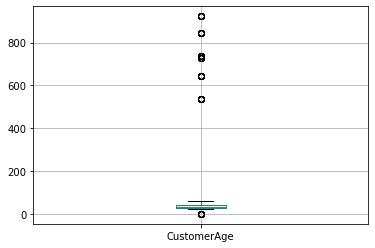

In [4]:
# check out customer age
dirtydata.boxplot(column='CustomerAge')


<AxesSubplot:>

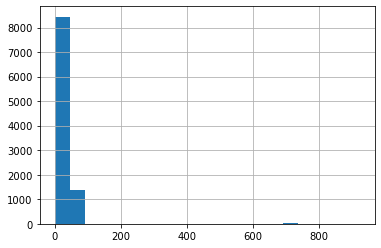

In [5]:
# check out customer age with a histogram
dirtydata['CustomerAge'].hist(bins=20)

In [6]:
# look at details of LenenovaLaptop
dirtydata.LenevoLaptop.describe()

count    9976.000000
mean        0.629711
std         0.627375
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: LenevoLaptop, dtype: float64

<AxesSubplot:>

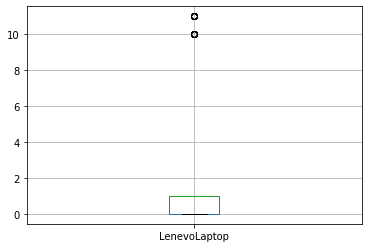

In [7]:
dirtydata.boxplot(column='LenevoLaptop')

<AxesSubplot:>

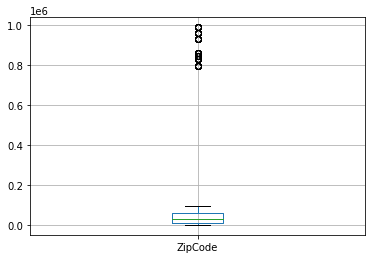

In [8]:
# look at zip codes
dirtydata.boxplot(column='ZipCode')


### Lets clean the dirty/messy data in the dirtydata dataframe object

You need to write your python code such that:
1. rows/records/tuples/transactions in the data frame that have missing values for fields/columns will be removed
2. rows/records/tuples/transactions in the data frame that have invalid/abnormal values for fields/columns will be removed

Examples of invalid/dirty/messy data:
  1. NaN values in the dataframe (Blank/Empty cells in the CSV file)

  2. Every product has a value 1 which means bought or 0 which means NOT bought; values like 11, 10, 9 are examples of invalid data

  3. CustomerAge value range could be from 18 to 100; values like 723, 634 are examples of invalid data
  
  4. Zipcode should have 5 digits


In [9]:
# what is the shape of cleandata before manipulating it?
dirtydata.shape

# Drop the NaN values - remember that dropna will make a new copy of the dataframe
cleandata = dirtydata.dropna()

# how did this affect the data?
cleandata.shape

# Do you see NaN values dropped below?
cleandata.head()

(10000, 34)

(9432, 34)

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1,1,0,0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1,0,0,1,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
3,60616.0,56.0,0,1,1,1,0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
5,2108.0,55.0,1,1,1,1,10,0.0,0.0,0.0,...,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0
6,90033.0,44.0,1,1,1,1,0,0.0,0.0,0.0,...,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1


In [10]:
#Explore Data
cleandata.dtypes

ZipCode               float64
CustomerAge           float64
SamsungTV46LED          int64
SonyTV42LED            object
XBOX360                object
DellLaptop             object
BoseSoundSystem        object
BoseHeadSet           float64
SonyHeadSet           float64
iPod                  float64
iPhone                float64
Panasonic50LED        float64
SonyPS4               float64
WiiU                  float64
WDexternalHD          float64
SamsungTV55LED        float64
SonyTV60LED           float64
SandiskMemoryCard     float64
SonySoundSystem       float64
SonyCamera              int64
PanasonicCamera         int64
HPPrinter             float64
SonyDVDplayer         float64
ToshibaDVDplayer      float64
GalaxyTablet            int64
SurfaceTablet         float64
HPLaptop              float64
HDMICable             float64
SpeakerCable          float64
CallOfDutyGame        float64
GrandTheftAutoGame    float64
ASUSLaptop            float64
LenevoLaptop          float64
TVStandWal

In [11]:
#Explore data
cleandata.ZipCode.value_counts().head()

30134.0    1173
30303.0    1001
60616.0     960
2109.0      955
10065.0     788
Name: ZipCode, dtype: int64

In [12]:
# ----------------------------------------------------------------------------------


# Add the rest of your code here to clean the data

#steps you must take
#- eliminate NA's
#- product values should only be either a 0 or a 1
#- customer's age needs to be valid
#- zipcodes should have 5 digits
# - all numbers should be integers

# Optional steps
# - if there are other things you want to clean, clearly document them
#   and run them in this section before you create a database


# ----------------------------------------------------------------------------------

In [13]:
#Change columns from objects to floats

cleandata['SonyTV42LED'] = pd.to_numeric(cleandata['SonyTV42LED'],errors='coerce')
cleandata['XBOX360'] = pd.to_numeric(cleandata['XBOX360'] ,errors='coerce')
cleandata['DellLaptop'] = pd.to_numeric(cleandata['DellLaptop'],errors='coerce')
cleandata['BoseSoundSystem'] = pd.to_numeric(cleandata['BoseSoundSystem'],errors='coerce')

cleandata.shape
cleandata.info()

<ipython-input-13-4e96d70b0d61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandata['SonyTV42LED'] = pd.to_numeric(cleandata['SonyTV42LED'],errors='coerce')
<ipython-input-13-4e96d70b0d61>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandata['XBOX360'] = pd.to_numeric(cleandata['XBOX360'] ,errors='coerce')
<ipython-input-13-4e96d70b0d61>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

(9432, 34)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9432 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ZipCode             9432 non-null   float64
 1   CustomerAge         9432 non-null   float64
 2   SamsungTV46LED      9432 non-null   int64  
 3   SonyTV42LED         9431 non-null   float64
 4   XBOX360             9430 non-null   float64
 5   DellLaptop          9430 non-null   float64
 6   BoseSoundSystem     9431 non-null   float64
 7   BoseHeadSet         9432 non-null   float64
 8   SonyHeadSet         9432 non-null   float64
 9   iPod                9432 non-null   float64
 10  iPhone              9432 non-null   float64
 11  Panasonic50LED      9432 non-null   float64
 12  SonyPS4             9432 non-null   float64
 13  WiiU                9432 non-null   float64
 14  WDexternalHD        9432 non-null   float64
 15  SamsungTV55LED      9432 non-null   float64
 16  SonyTV

In [17]:
#HAD TO DO THIS STEM TO CHANGE TO INTEGERS
#Drop all NaN values 
cleandata = cleandata.dropna()

#Change columns to integers
cleandata = cleandata.astype(int)

cleandata.shape

(9430, 34)

In [19]:
#I HAD A BIG DROP IN ROWS AFTER THE AGE AND ZIP CODE CLEANING

#Age
cleandata = cleandata[cleandata.CustomerAge.between(18,100)]

#Zip Code
cleandata = cleandata[cleandata.ZipCode.astype(str).str.len() == 5]

cleandata.shape

(7512, 34)

In [20]:
#Replace any values that are not 0 or 1 in the specified columns with 'NaN'
cleandata[~cleandata[['SamsungTV46LED','SonyTV42LED', 'XBOX360' , 'DellLaptop' , 'BoseSoundSystem' , \
                      'BoseHeadSet' , 'SonyHeadSet' , 'iPod' , 'iPhone' , 'Panasonic50LED' , 'SonyPS4' , \
                      'WiiU' , 'WDexternalHD' , 'SamsungTV55LED' , 'SonyTV60LED' , 'SandiskMemoryCard', \
                      'SonySoundSystem' , 'SonyCamera' , 'PanasonicCamera' , 'HPPrinter' , 'SonyDVDplayer', \
                      'ToshibaDVDplayer' , 'GalaxyTablet' , 'SurfaceTablet' , 'HPLaptop' , 'HDMICable' , \
                      'SpeakerCable' , 'CallOfDutyGame' , 'GrandTheftAutoGame' , 'ASUSLaptop' , \
                      'LenevoLaptop' , 'TVStandWallMount' ,\
                     ]].isin([0,1])]= np.nan

cleandata.shape

(7512, 34)

In [21]:
cleandata = cleandata.dropna()
cleandata.shape
cleandata.head(15)

(7338, 34)

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134,35,1,1,1,0.0,0,1.0,1,0.0,...,1.0,0.0,1,1,1.0,1,0.0,1,1,1.0
1,62791,43,0,1,0,0.0,1,0.0,1,0.0,...,1.0,0.0,1,0,1.0,1,0.0,1,1,1.0
3,60616,56,0,1,1,1.0,0,0.0,1,1.0,...,0.0,0.0,1,0,1.0,0,0.0,1,0,0.0
6,90033,44,1,1,1,1.0,0,0.0,0,0.0,...,1.0,1.0,1,1,0.0,1,1.0,0,0,1.0
13,62791,27,1,1,0,1.0,0,0.0,0,0.0,...,1.0,1.0,1,0,0.0,1,0.0,1,1,1.0
16,60616,43,0,1,1,0.0,1,0.0,1,0.0,...,1.0,0.0,1,1,1.0,1,0.0,1,1,1.0
18,60616,54,1,0,0,1.0,0,1.0,1,0.0,...,0.0,1.0,1,0,1.0,1,0.0,1,1,1.0
19,60603,59,0,1,1,1.0,0,0.0,1,1.0,...,1.0,0.0,1,0,0.0,1,1.0,0,0,1.0
20,30134,28,1,1,1,0.0,1,1.0,1,0.0,...,0.0,1.0,1,0,1.0,0,0.0,1,1,0.0
21,33130,27,1,1,1,1.0,0,0.0,0,0.0,...,1.0,0.0,1,0,0.0,1,0.0,1,1,1.0


<AxesSubplot:>

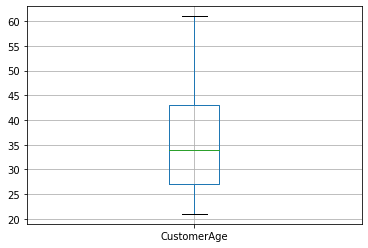

In [22]:
# after cleaning the customer age - does the boxplot still show outliers?
# how does the histogram look?
# if this does not look better - you are not ready to proceed
cleandata.boxplot(column='CustomerAge')


<AxesSubplot:>

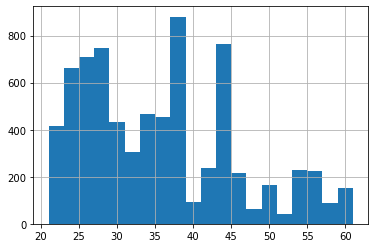

In [23]:
cleandata['CustomerAge'].hist(bins=20)

### Lets store the cleaned data into the Database

In [24]:
# how many records did you end up with after the data cleaning?
cleandata.shape

(7338, 34)

In [25]:
# now that your data has been cleaned, lets store it in a database

# NOTE - the parameters to replace an existing database if it already exists

engine = create_engine('sqlite:///bestdeal.db')

In [26]:
cleandata.to_sql('trans4cust', engine, if_exists = 'replace', index = False)

** Sanity Test: Did it create the table in bestdeal.db?  Check!!**

In [23]:
insp = inspect(engine)

In [24]:
insp.get_table_names()

['trans4cust']

In [25]:
pd.read_sql_table('trans4cust', engine).columns

Index(['ZipCode', 'CustomerAge', 'SamsungTV46LED', 'SonyTV42LED', 'XBOX360',
       'DellLaptop', 'BoseSoundSystem', 'BoseHeadSet', 'SonyHeadSet', 'iPod',
       'iPhone', 'Panasonic50LED', 'SonyPS4', 'WiiU', 'WDexternalHD',
       'SamsungTV55LED', 'SonyTV60LED', 'SandiskMemoryCard', 'SonySoundSystem',
       'SonyCamera', 'PanasonicCamera', 'HPPrinter', 'SonyDVDplayer',
       'ToshibaDVDplayer', 'GalaxyTablet', 'SurfaceTablet', 'HPLaptop',
       'HDMICable', 'SpeakerCable', 'CallOfDutyGame', 'GrandTheftAutoGame',
       'ASUSLaptop', 'LenevoLaptop', 'TVStandWallMount'],
      dtype='object')

### Now we are ready to query the Database

#### Query example #1: get the transactions for the customers in zipCode 60616

In [26]:
# ======================================================================
# **********************************************************************
# 
# WARNING - this pre-run notebook is using dirty data
# WARNING - after cleaning the data, your output should look different
#
# ======================================================================
# **********************************************************************

In [27]:
q1 = pd.read_sql_query("SELECT * \
                FROM trans4cust \
                WHERE ZipCode='60616'", engine)

q1.head()

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,60616,56,0,1,1,1.0,0,0.0,1,1.0,...,0.0,0.0,1,0,1.0,0,0.0,1,0,0.0
1,60616,43,0,1,1,0.0,1,0.0,1,0.0,...,1.0,0.0,1,1,1.0,1,0.0,1,1,1.0
2,60616,54,1,0,0,1.0,0,1.0,1,0.0,...,0.0,1.0,1,0,1.0,1,0.0,1,1,1.0
3,60616,43,1,1,1,0.0,1,1.0,1,0.0,...,1.0,1.0,1,1,0.0,1,0.0,1,1,1.0
4,60616,31,0,1,1,1.0,0,0.0,1,1.0,...,1.0,0.0,1,1,1.0,1,1.0,0,0,1.0


#### Query example #2: get the transactions for ALL customers

In [28]:
q2 = pd.read_sql_query("SELECT * \
                FROM trans4cust", engine)

q2.head()

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134,35,1,1,1,0.0,0,1.0,1,0.0,...,1.0,0.0,1,1,1.0,1,0.0,1,1,1.0
1,62791,43,0,1,0,0.0,1,0.0,1,0.0,...,1.0,0.0,1,0,1.0,1,0.0,1,1,1.0
2,60616,56,0,1,1,1.0,0,0.0,1,1.0,...,0.0,0.0,1,0,1.0,0,0.0,1,0,0.0
3,90033,44,1,1,1,1.0,0,0.0,0,0.0,...,1.0,1.0,1,1,0.0,1,1.0,0,0,1.0
4,62791,27,1,1,0,1.0,0,0.0,0,0.0,...,1.0,1.0,1,0,0.0,1,0.0,1,1,1.0


#### Query example #3: get the number of customers in every ZipCode sorted by ZipCode

In [29]:
q3 = pd.read_sql_query("SELECT ZipCode , COUNT(*) as 'num_customers' \
            FROM trans4cust \
            GROUP BY ZipCode \
            ORDER BY ZipCode", engine)

q3.head()

,ZipCode,num_customers
0,10065,750
1,30134,1133
2,30303,985
3,33129,531
4,33130,280


#### Query example #4: get the number of customers for  every Age Group in ZipCode 60616 sorted by CustomerAge

In [30]:
q4 = pd.read_sql_query(
        "SELECT CustomerAge , COUNT(*) as 'num_customers' \
        FROM trans4cust \
        WHERE ZipCode=60616 \
        GROUP BY CustomerAge  \
        ORDER BY CustomerAge", engine)

q4.head()

,CustomerAge,num_customers
0,21,56
1,22,32
2,23,40
3,25,88
4,26,48


#### Query example #5: Plot in a stacked-bar figure the number of customers who bought SonyTV60LED and/or BoseSoundSystem in  every zipcode that has more than 400 customers who bought these two products(either bought one of these products or the two products)

In [31]:
SonyTV60LEDCustTrans = pd.read_sql_query(
    "SELECT ZipCode , COUNT(*) as 'num_customers' \
    FROM trans4cust \
    WHERE SonyTV60LED=1  \
    GROUP BY ZipCode \
    HAVING COUNT(*) > 400", engine)

BoseSoundSystemCustTrans = pd.read_sql_query(
    "SELECT ZipCode , COUNT(*) as 'num_customers'\
    FROM trans4cust \
    WHERE BoseSoundSystem=1 \
    GROUP BY ZipCode \
    HAVING COUNT(*) > 400", engine)

In [32]:
SonyTV60LEDCustTrans

,ZipCode,num_customers
0,10065,439
1,30134,757
2,30303,517
3,60616,689


In [33]:
BoseSoundSystemCustTrans

,ZipCode,num_customers
0,30134,799
1,30303,464
2,60616,466
3,90033,404


In [34]:
SonyTV60LEDCustTrans.ZipCode


0    10065
1    30134
2    30303
3    60616
Name: ZipCode, dtype: int64

In [35]:
import numpy

#   There are zipcodes that Sony got bought but not Bose 
#   but there are also zipcodes that Bose got bought but not Sony
#
#   AND we need to use stacked-bar graph and we have a potentially asymmetrical set  of zipcode values
#   So, we need to do somework to create the symmteric set of zipcode values for Sony and Bose


sonyZipCodeTuples = tuple(SonyTV60LEDCustTrans.ZipCode.astype(numpy.int))
sony_num_customersTuples = tuple(SonyTV60LEDCustTrans.num_customers.astype(numpy.int))

boseZipCodeTuples = tuple(BoseSoundSystemCustTrans.ZipCode.astype(numpy.int))
bose_num_customersTuples = tuple(BoseSoundSystemCustTrans.num_customers.astype(numpy.int))

sony_dict = dict(zip(sonyZipCodeTuples, sony_num_customersTuples))
bose_dict = dict(zip(boseZipCodeTuples, bose_num_customersTuples))

for key in bose_dict.keys():
    if ((key in sony_dict.keys()) == False): sony_dict[key]=0
        
for key in sony_dict.keys():
    if ((key in bose_dict.keys()) == False): bose_dict[key]=0
        
bose_zip = sorted(bose_dict.keys())

sony_zip = sorted(sony_dict.keys())

bose_zip_tuple = tuple(bose_zip)

sony_zip_tuple = tuple(sony_zip)

bose_customer_list = []

for bose in bose_zip_tuple:
    bose_customer_list.append(bose_dict[bose])

sony_customer_list = []

for sony in sony_zip_tuple:
    sony_customer_list.append(sony_dict[sony])

bose_customer_tuple = tuple(bose_customer_list)
sony_customer_tuple = tuple(sony_customer_list)


<ipython-input-35-26bcf2712bb0>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sonyZipCodeTuples = tuple(SonyTV60LEDCustTrans.ZipCode.astype(numpy.int))
<ipython-input-35-26bcf2712bb0>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional inf

Text(0, 0.5, 'Number of Customers')

Text(0.5, 0, 'Zip Code')

Text(0.5, 1.0, 'Number of Customers by ZipCode and 2 Products')

([<matplotlib.axis.XTick at 0x7fba805d5220>,
 [Text(0.5, 0, '10065'),
  Text(1.5, 0, '30134'),
  Text(2.5, 0, '30303'),
  Text(3.5, 0, '60616'),
  Text(4.5, 0, '90033')])

([<matplotlib.axis.YTick at 0x7fba805d5a60>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

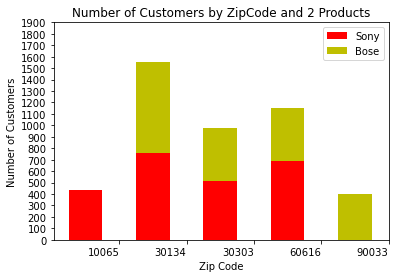

In [36]:
# See docs for bar_stack at the URL
# http://matplotlib.org/examples/pylab_examples/bar_stacked.html

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

ind = np.arange(len(sony_customer_tuple))    

# the width of the bars: can also be len(x) sequence
width = .5

p1 = plt.bar(ind, sony_customer_tuple, width,  color='r')
p2 = plt.bar(ind, bose_customer_tuple, width, color='y', bottom=sony_customer_tuple)

plt.ylabel('Number of Customers')
plt.xlabel('Zip Code')

plt.title('Number of Customers by ZipCode and 2 Products')

plt.xticks(ind + width, sony_zip_tuple, horizontalalignment='right')

plt.yticks(np.arange(0, 2000, 100))
plt.legend((p1[0], p2[0]), ('Sony', 'Bose'))

plt.show()

## Alternative code for above 2 cells

### Join Options
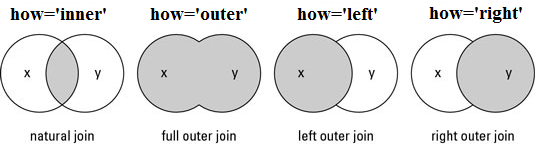
https://www.datasciencemadesimple.com/join-merge-data-frames-pandas-python/

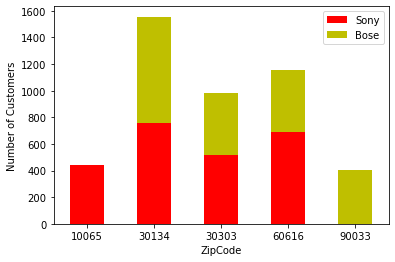

In [37]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

df =pd.merge(SonyTV60LEDCustTrans, BoseSoundSystemCustTrans, 
         on='ZipCode',how='outer').fillna(0)
#df

df.columns = ['ZipCode', 'Sony', 'Bose'];
df.set_index('ZipCode').plot(kind='bar',stacked=True,
                             rot = 0, color=['r','y']);
plt.ylabel('Number of Customers');
plt.show();

<div class="alert alert-block alert-warning">
    
# Requirements :

Answer the homework questions below; add cells as needed.

</div>

### Requirement 1 (7 points)

Show the shape of your data and the variable types of your data. You will get points for **clean data** - no NA's, product values of only 0 or 1, valid customer ages, and zipcodes with 5 digits.

In [38]:
cleandata.shape
cleandata.info()

(7338, 34)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7338 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ZipCode             7338 non-null   int64  
 1   CustomerAge         7338 non-null   int64  
 2   SamsungTV46LED      7338 non-null   int64  
 3   SonyTV42LED         7338 non-null   int64  
 4   XBOX360             7338 non-null   int64  
 5   DellLaptop          7338 non-null   float64
 6   BoseSoundSystem     7338 non-null   int64  
 7   BoseHeadSet         7338 non-null   float64
 8   SonyHeadSet         7338 non-null   int64  
 9   iPod                7338 non-null   float64
 10  iPhone              7338 non-null   int64  
 11  Panasonic50LED      7338 non-null   int64  
 12  SonyPS4             7338 non-null   int64  
 13  WiiU                7338 non-null   float64
 14  WDexternalHD        7338 non-null   int64  
 15  SamsungTV55LED      7338 non-null   float64
 16  SonyTV

### Requirement 2 (7 points) - Use SQL/SQLite

a) Show the top 3 zip codes with the most customers.  <br>
b) Using just the top 3 zip codes, what are the ages of the customers? Sort the output by highest count on top.

In [39]:
topzips = pd.read_sql_query(
    "SELECT ZipCode, COUNT(*) as 'num_customers' \
    FROM trans4cust \
    GROUP BY ZipCode ORDER BY num_customers DESC LIMIT 3", engine)
print(topzips)

#The top three zip codes with the most customers are 30134, 30303, and 60616.

   ZipCode  num_customers
0    30134           1133
1    30303            985
2    60616            951


In [40]:
zipages = pd.read_sql_query(
    "SELECT CustomerAge, COUNT(*) as 'num_customers' \
    FROM trans4cust \
    WHERE (ZipCode = 30134.0 OR ZipCode = 30303.0 OR ZipCode = 60616.0) \
    GROUP BY CustomerAge \
    ORDER BY num_customers DESC", engine)

zipages.head(5)

#The ages of the customers within the top three zip codes are 


,CustomerAge,num_customers
0,25,277
1,34,231
2,44,222
3,29,214
4,43,191


### Requirement 3 (7 points) - Use SQL/SQLite

Get the number of customers that bought both a DellLaptop and HPPrinter. Show the results for every age and sort the output by age so that the oldest customers are shown at the top.

In [41]:
DellLaptopHPPrinterCustTrans = pd.read_sql_query(
    "SELECT CustomerAge, COUNT(*) as 'num_customers' \
    FROM trans4cust \
    WHERE DellLaptop = 1 AND HPPrinter = 1  \
    GROUP BY CustomerAge ORDER BY CustomerAge DESC", engine)

DellLaptopHPPrinterCustTrans.head(5)

,CustomerAge,num_customers
0,61,32
1,59,80
2,57,25
3,56,162
4,54,108


DellLaptopCustTrans = pd.read_sql_query(
    "SELECT CustomerAge , COUNT(*) as 'num_customers' \
    FROM trans4cust \
    WHERE DellLaptop = 1  \
    GROUP BY CustomerAge DESC", engine)

HPPrinterCustTrans = pd.read_sql_query(
    "SELECT CustomerAge , COUNT(*) as 'num_customers' \
    FROM trans4cust \
    WHERE HPPrinter = 1  \
    GROUP BY CustomerAge DESC", engine
 

### Requirement 4 (7 points) - Use SQL/SQLite

a) How many customers are in the 25 and under group? <br>
b) Of these customers, how many iPods were purchased? How many CallOfDutyGame were purchased? <br>
c) How many customers are in the 55 and over group? <br>
d) Of these customers, how many iPods were purchased? How many CallOfDutyGame were purchased? <br>

In [42]:
#UNDER 25 - CUSTOMER COUNT

Under25 = pd.read_sql_query(
    "SELECT COUNT(*) as 'num_customers' \
    FROM trans4cust \
    WHERE CustomerAge <= 25", engine)
Under25.head()

#1504 customers are in the 25 and younger group.

,num_customers
0,1504


Under25 = pd.read_sql_query(
    "SELECT CustomerAge , COUNT(*) as 'num_customers' \
    FROM trans4cust \
    WHERE CustomerAge <= 25 \
    GROUP BY CustomerAge", engine)
Under25.head()

In [43]:
#UNDER 25 - IPODS PURCHASED

Under25iPod = pd.read_sql_query(
    "SELECT COUNT(*) as 'num_customers' \
    FROM trans4cust \
    WHERE CustomerAge <= 25 AND iPod = 1 \
    GROUP BY iPod", engine)
Under25iPod.head()

#243 iPods were purchased among customers 25 and younger.

,num_customers
0,243


In [44]:
#UNDER 25 - CODS PURCHASED

Under25COD = pd.read_sql_query(
    "SELECT COUNT(*) as 'num_customers' \
    FROM trans4cust \
    WHERE CustomerAge <= 25 and CallOfDutyGame = 1 \
    GROUP BY CallOfDutyGame", engine)
Under25COD.head()

#1379 Call of Duty games were purchased among customers 25 and younger.

,num_customers
0,1379


In [45]:
#OVER 55 - CUSTOMER COUNT

Over55 = pd.read_sql_query(
    "SELECT COUNT(*) as 'num_customers' \
    FROM trans4cust \
    WHERE CustomerAge >= 55", engine)
Over55.head()

#467 customers are in the 55 and older group.

,num_customers
0,467


In [46]:
#OVER 55 - IPODS PURCHASED

Over55iPod = pd.read_sql_query(
    "SELECT COUNT(*) as 'num_customers' \
    FROM trans4cust \
    WHERE CustomerAge <= 55 and iPod = 1 \
    GROUP BY iPod", engine)
Over55iPod.head()

#1057 iPods were purchased among customers 55 and older.

,num_customers
0,1057


In [47]:
#OVER 55 - CODS PURCHASED

Over55COD = pd.read_sql_query(
    "SELECT COUNT(*) as 'num_customers' \
    FROM trans4cust \
    WHERE CustomerAge <= 55 and CallOfDutyGame = 1 \
    GROUP BY CallOfDutyGame", engine)
Over55COD.head()

#4911 Call of Duty games were purchased among customers 55 and older.

,num_customers
0,4911


### Requirement 5 (12 points) - Use SQL/SQLite
 
Plot in a stacked-bar figure the number of customers who bought HPLaptop and/or HPPrinter but did NOT buy WDexternalHD for every CustomerAge group that has more than 100 customers who bought these two products (either bought one of these products or the two products but didn't buy WDexternalHD).

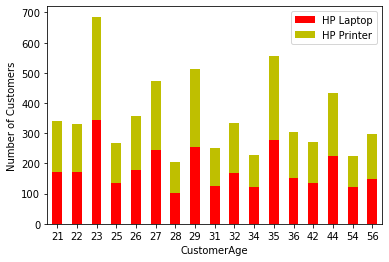

In [48]:
HPLaptopCustTrans = pd.read_sql_query(
    "SELECT CustomerAge, COUNT(*) as 'num_customers' \
    FROM trans4cust \
    WHERE HPLaptop = 1 AND WDexternalHD = 0 \
    GROUP BY CustomerAge \
    HAVING COUNT(*) > 100", engine) 

HPPrinterCustTrans = pd.read_sql_query(
    "SELECT CustomerAge, COUNT(*) as 'num_customers' \
    FROM trans4cust \
    WHERE HPPrinter = 1 AND WDexternalHD = 0 AND WDexternalHD = 0 \
    GROUP BY CustomerAge \
    HAVING COUNT(*) > 100", engine) 

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

BarChart = pd.merge(HPLaptopCustTrans, HPPrinterCustTrans, 
         on ='CustomerAge', how ='outer').fillna(0)

BarChart.columns = ['CustomerAge', 'HP Laptop', 'HP Printer'];
BarChart.set_index('CustomerAge').plot(kind='bar',stacked=True,
                             rot = 0, color=['r','y']);
plt.ylabel('Number of Customers');
plt.show();
